In [2]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [3]:
# MPC import
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [6]:
### Open-loop: 30 degrees roll

Ts = 0.05
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
H = 2.5 # MPC horizon in seconds
x0 = np.array([0, 0, 0, 0, 0, 30 * np.pi / 180, 0, 0, 0, 0, 0, 2.0])  # initial state

mpc = MPCVelControl().new_controller(rocket, Ts, H)
t0 = 0
u, x_ol, u_ol, t_ol, = mpc.get_u(t0, x0)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_ol[:-1], x_ol[:,:-1], u_ol);

setting up xvel
setting up yvel
setting up zvel
setting up roll


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=49, step=2), IntSlider(value=0,…

In [7]:
### Open-loop: 5 m/s v

Ts = 0.05
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
H = 4 # MPC horizon in seconds
x0 = np.array([0, 0, 0, 0, 0, 0, 5.0, 5.0, 5.0, 0, 0, 2.0])  # initial state

mpc = MPCVelControl().new_controller(rocket, Ts, H)
t0 = 0
u, x_ol, u_ol, t_ol, = mpc.get_u(t0, x0)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_ol[:-1], x_ol[:,:-1], u_ol);

setting up xvel
setting up yvel
setting up zvel
setting up roll


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=79, step=2), IntSlider(value=0,…

setting up xvel


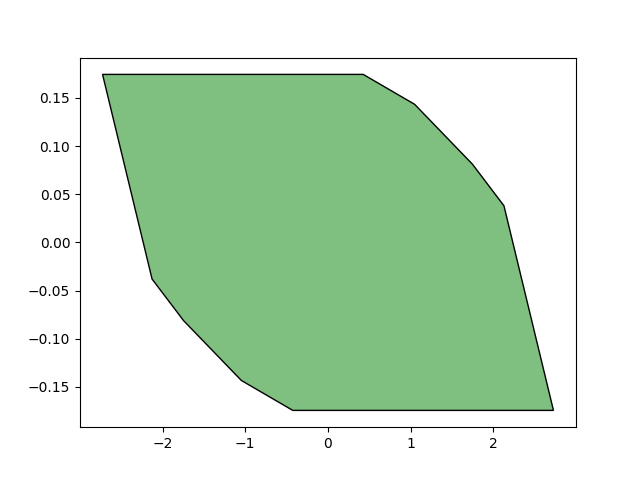

In [5]:
### invariant set plot

from LinearMPC.MPCControl_xvel import MPCControl_xvel
xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc_x = MPCControl_xvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
# omega_y, beta, v_x
x0 = np.array([0, 0, 0])
u0, x_traj, u_traj = mpc_x.get_u(x0) # x and u for single subsystem

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mpc_x.O_inf.projection(dims=(0,1)).plot(ax, color='g', opacity=0.5, show_vertices=False)



In [8]:
### Close-loop: 30 degrees roll

Ts = 0.05
sim_time = 5
H = 2
# [[w_x, w_y, w_z], [alpha, beta, gamma], [v_x, v_y, v_z], [x,y,z]]
x0 = np.array([0, 0, 0, 0, 0, 30 * np.pi / 180, 0, 0, 0, 0, 0, 2.0])  # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);

setting up xvel
setting up yvel
setting up zvel
setting up roll
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 

/opt/homebrew/anaconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(



Simulating time 2.30: 
Simulating time 2.35: 
Simulating time 2.40: 
Simulating time 2.45: 
Simulating time 2.50: 
Simulating time 2.55: 
Simulating time 2.60: 
Simulating time 2.65: 
Simulating time 2.70: 
Simulating time 2.75: 
Simulating time 2.80: 
Simulating time 2.85: 
Simulating time 2.90: 
Simulating time 2.95: 
Simulating time 3.00: 
Simulating time 3.05: 
Simulating time 3.10: 
Simulating time 3.15: 
Simulating time 3.20: 
Simulating time 3.25: 
Simulating time 3.30: 
Simulating time 3.35: 
Simulating time 3.40: 
Simulating time 3.45: 
Simulating time 3.50: 
Simulating time 3.55: 
Simulating time 3.60: 
Simulating time 3.65: 
Simulating time 3.70: 
Simulating time 3.75: 
Simulating time 3.80: 
Simulating time 3.85: 
Simulating time 3.90: 
Simulating time 3.95: 
Simulating time 4.00: 
Simulating time 4.05: 
Simulating time 4.10: 
Simulating time 4.15: 
Simulating time 4.20: 
Simulating time 4.25: 
Simulating time 4.30: 
Simulating time 4.35: 
Simulating time 4.40: 
Simulating

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=99, step=2), IntSlider(value=0,…

In [9]:
### Close-loop: 5 m/s v

Ts = 0.05
sim_time = 5
H = 4
# [[w_x, w_y, w_z], [alpha, beta, gamma], [v_x, v_y, v_z], [x,y,z]]
x0 = np.array([0, 0, 0, 0, 0, 0, 5.0, 5.0, 5.0, 0, 0, 2.0])  # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);

setting up xvel
setting up yvel
setting up zvel
setting up roll
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=99, step=2), IntSlider(value=0,…